In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from keras import backend
import matplotlib.pyplot as plt

(x_train, y_train), (x_val, y_val) = mnist.load_data()

x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train)

In [2]:
# no hidden layers
model1 = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),    
    Dense(10)
])

model1.compile(optimizer='SGD',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])
backend.set_value(model1.optimizer.learning_rate, 0.25)

model1_fit = model1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

model1.summary()

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.4175 - accuracy: 0.1559 - val_loss: 41.8621 - val_accuracy: 0.0172
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.9083 - accuracy: 0.1209 - val_loss: 44.2585 - val_accuracy: 0.0172
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.9234 - accuracy: 0.1209 - val_loss: 44.1603 - val_accuracy: 0.0172
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.9319 - accuracy: 0.1209 - val_loss: 43.4597 - val_accuracy: 0.0172
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.8806 - accuracy: 0.1209 - val_loss: 44.0298 - val_accuracy: 0.0172
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.8800 - accuracy: 0.1209 - val_loss: 43.1684 - val_accuracy: 0.0172
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.8552 - accuracy: 0.1209 - val_loss: 43.6688 - val_ac

In [3]:
# One hidden layer of 7 neurons
model2 = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(7, activation='sigmoid'),    
    Dense(10)
])

model2.compile(optimizer='SGD',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])
backend.set_value(model2.optimizer.learning_rate, 0.25)

model2_fit = model2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

model2.summary()

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 5.0494 - accuracy: 0.1447 - val_loss: 6.6371 - val_accuracy: 0.0000e+00
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 7.4619 - accuracy: 0.0993 - val_loss: 6.6549 - val_accuracy: 0.0000e+00
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.5161 - accuracy: 0.0993 - val_loss: 8.0129 - val_accuracy: 0.0000e+00
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.5855 - accuracy: 0.0993 - val_loss: 8.0129 - val_accuracy: 0.0000e+00
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.5855 - accuracy: 0.0993 - val_loss: 8.0129 - val_accuracy: 0.0000e+00
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.5854 - accuracy: 0.0993 - val_loss: 8.0129 - val_accuracy: 0.0000e+00
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.5854 - accuracy: 0.0993 - val_loss

In [4]:
# One hidden layer with 49 neurons
model3 = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(49, activation='sigmoid'),    
    Dense(10)
])

model3.compile(optimizer='SGD',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])
backend.set_value(model3.optimizer.learning_rate, 0.25)

model3_fit = model3.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

model3.summary()

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 4.9236 - accuracy: 0.1333 - val_loss: 29.8646 - val_accuracy: 0.0643
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2167 - accuracy: 0.1381 - val_loss: 29.8646 - val_accuracy: 0.0643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2167 - accuracy: 0.1381 - val_loss: 29.8646 - val_accuracy: 0.0643
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2167 - accuracy: 0.1381 - val_loss: 29.8646 - val_accuracy: 0.0643
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2167 - accuracy: 0.1381 - val_loss: 29.8646 - val_accuracy: 0.0643
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2167 - accuracy: 0.1381 - val_loss: 29.8646 - val_accuracy: 0.0643
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2167 - accuracy: 0.1381 - val_loss: 29.8646 - val_ac

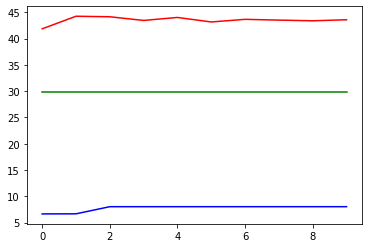

In [5]:
val1_loss   = model1_fit.history['val_loss']
val2_loss   = model2_fit.history['val_loss']
val3_loss   = model3_fit.history['val_loss']

xc         = range(10)

plt.figure()
plt.plot(xc, val1_loss,'red')
plt.plot(xc, val2_loss,'blue')
plt.plot(xc, val3_loss,'green')
plt.show()

In [6]:
# print(model1.history['loss'])

In [7]:
# plt.plot(list(model1.history.values())[0],'k-o')